In [77]:
import numpy as np 
import scipy as sp 
import pandas as pd 
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.notebook_repr_html', True)

from datetime import datetime, timedelta
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(rc={"figure.figsize": (30, 15)})  

from cryptocompare import get_daily_trade_hist
from indicators import *


In [78]:
btc = get_daily_trade_hist('BTC', all_data=True)


In [79]:
btc['prev_ath'] = btc.apply(lambda d: btc[:d.name].high.max(), axis=1)

In [80]:
btc['time_since_ath'] = btc.apply(lambda d: (d.name - btc[btc.prev_ath==d.prev_ath].index[0]).days , axis=1)

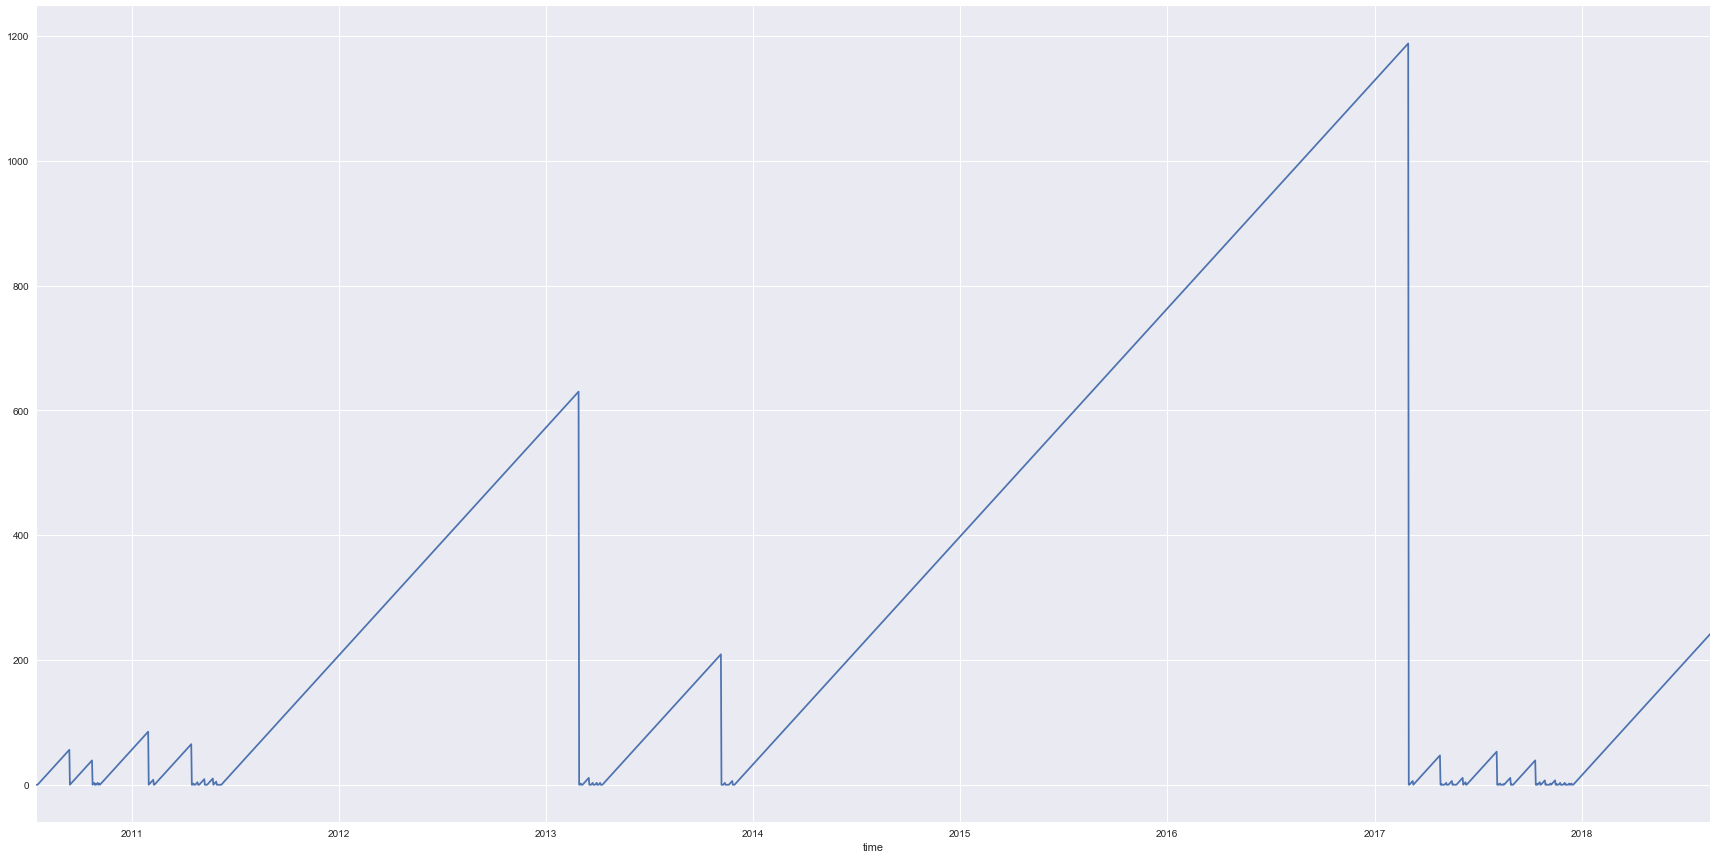

In [81]:
btc.time_since_ath.plot()

In [82]:
def plot_hist(series, start=None, end=None, plot_last=False, kde=False):
    s = series[start:end].dropna()
    sns.distplot(s,kde=kde)
    mean = s.mean()
    feature_label = s.name.replace('_', ' ')
    plt.axvline(mean, label='Mean {} ({})'.format(feature_label, round(mean ,4)), color='black', ls='--')
    
    if plot_last:
        last_val = s[-1]
        plt.axvline(last_val, label="Current {} ({})".format(feature_label, round(last_val,4)), color='yellow')
    
    plt.xlabel(feature_label)
    plt.legend() 
    plt.show()

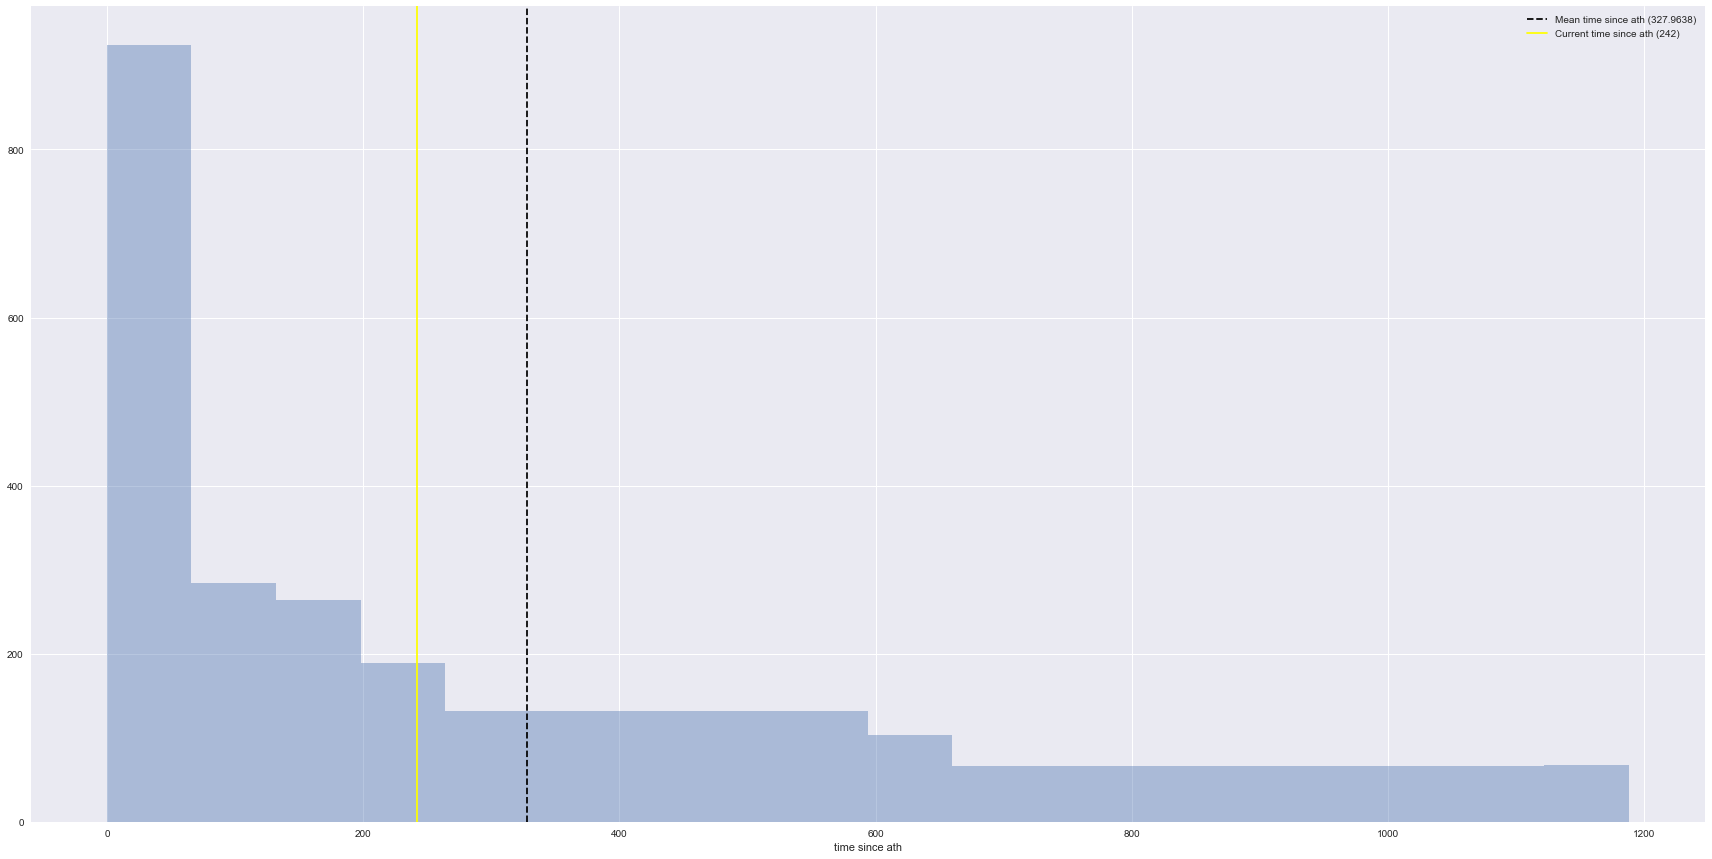

In [83]:
plot_hist(btc.time_since_ath, plot_last=True)

In [84]:
btc['direction'] = ((btc.close.pct_change() > 0) * 2) - 1 

In [85]:
btc['rolling_dir'] = btc.direction.rolling(9).sum()

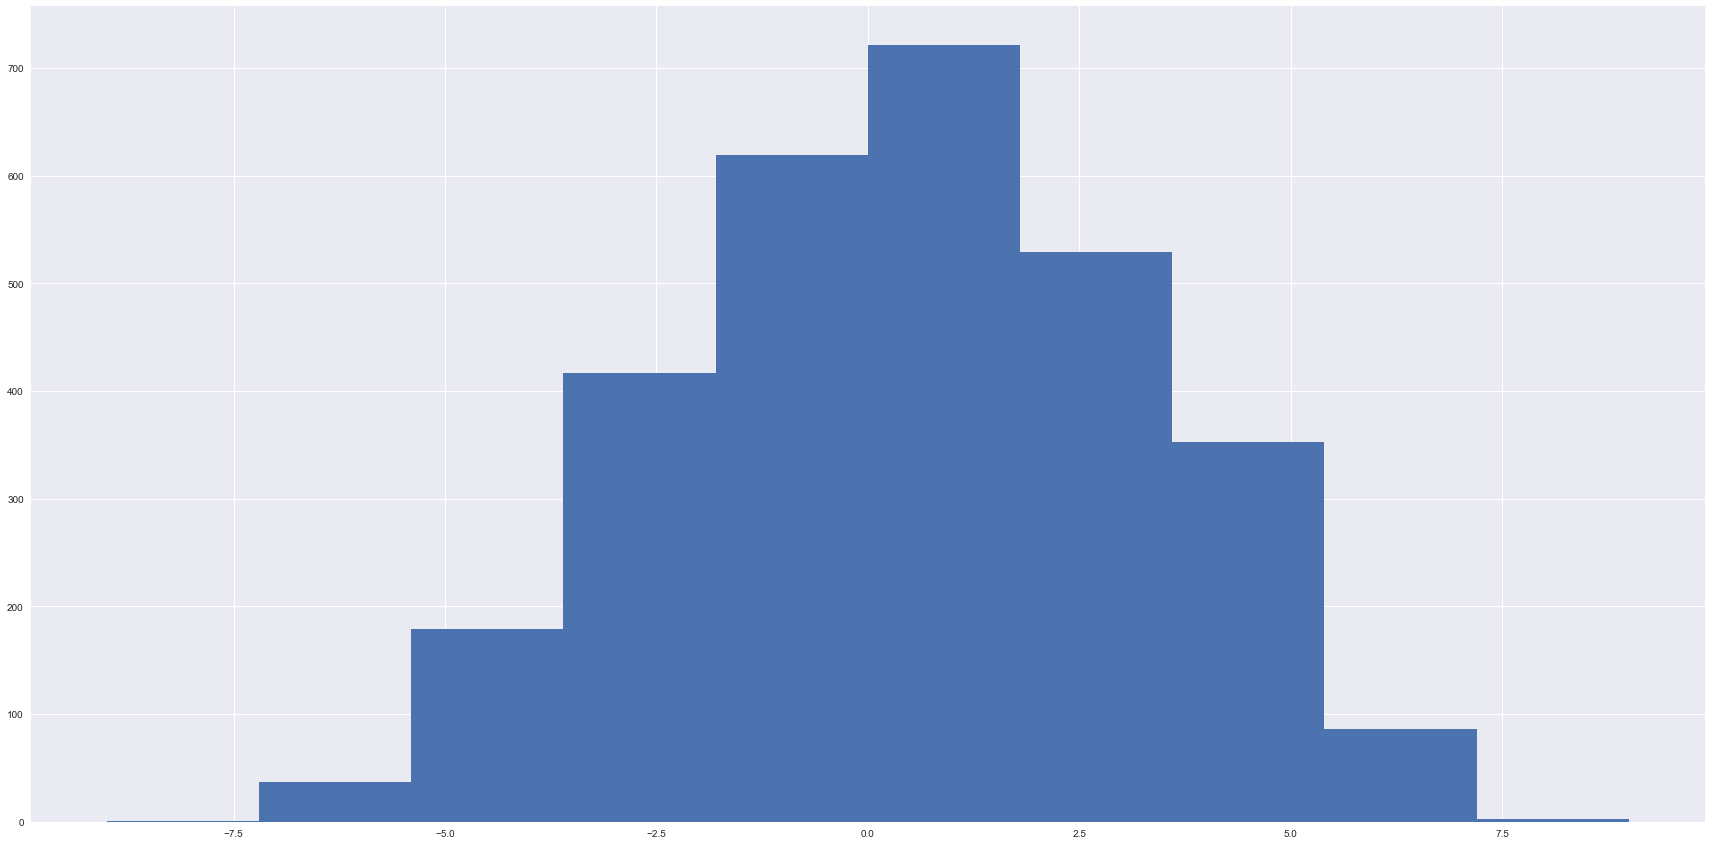

In [86]:
btc.direction.rolling(9).sum().hist()

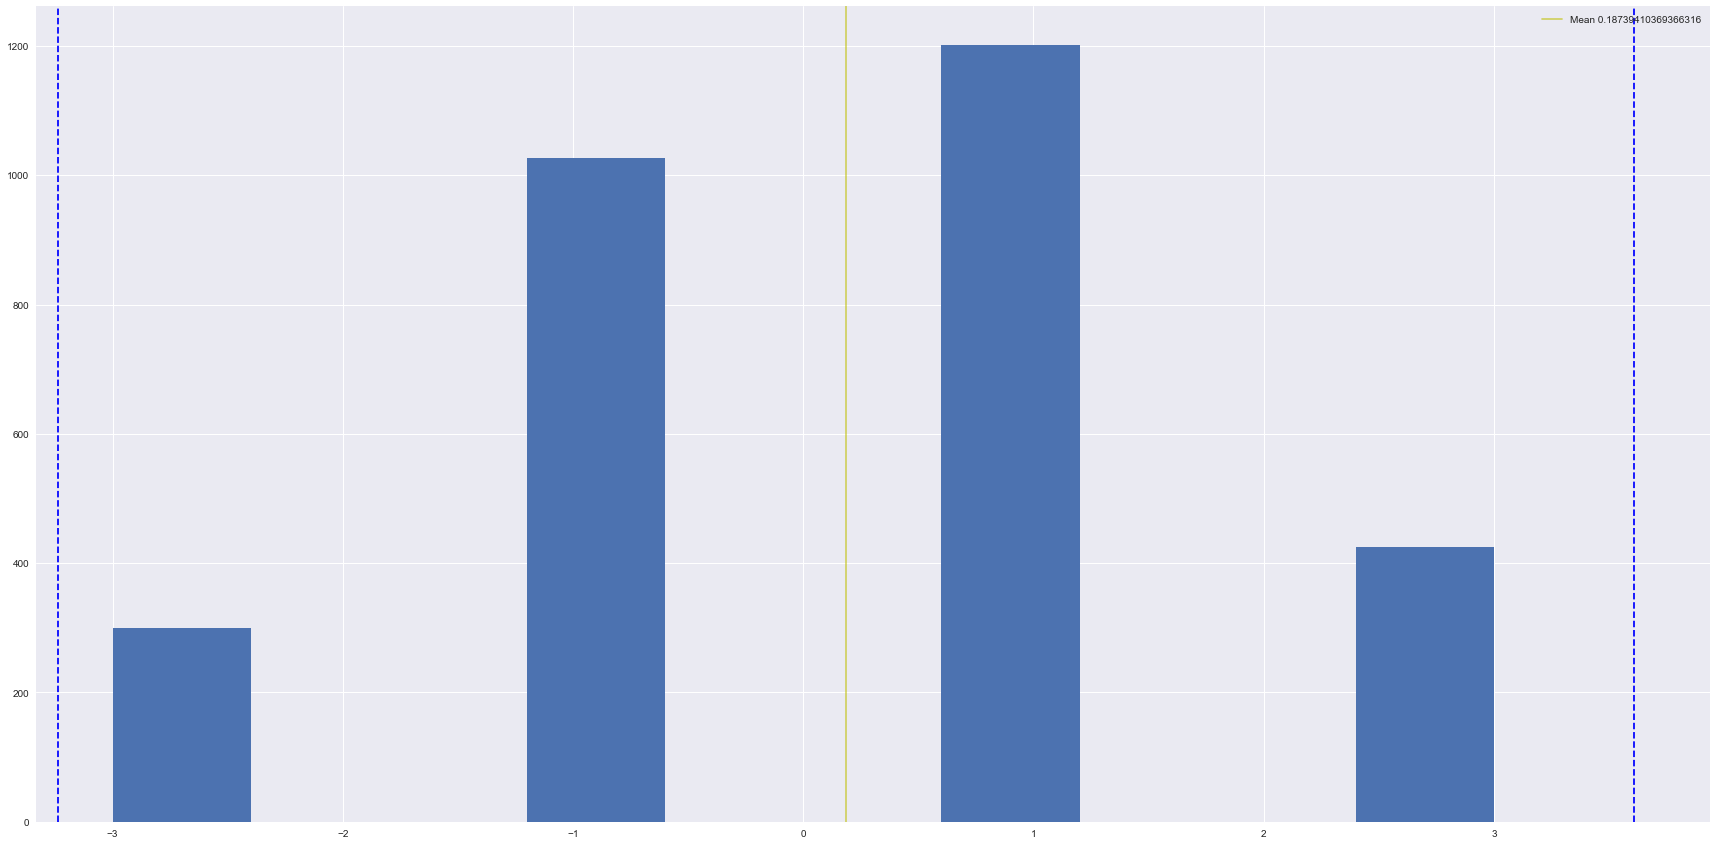

In [87]:
var = btc.direction.rolling(3).sum()
mu = var.mean()
median = var.median()
sigma = var.std() 
var.hist()
plt.axvline(mu, label='Mean {}'.format(mu), color='y', alpha=0.6)
plt.axvline(mu+(2*sigma), color='b', ls='--')
plt.axvline(mu-(2*sigma), color='b', ls='--')
plt.legend()
plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1095f7f28>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1096f1080>], dtype=object)

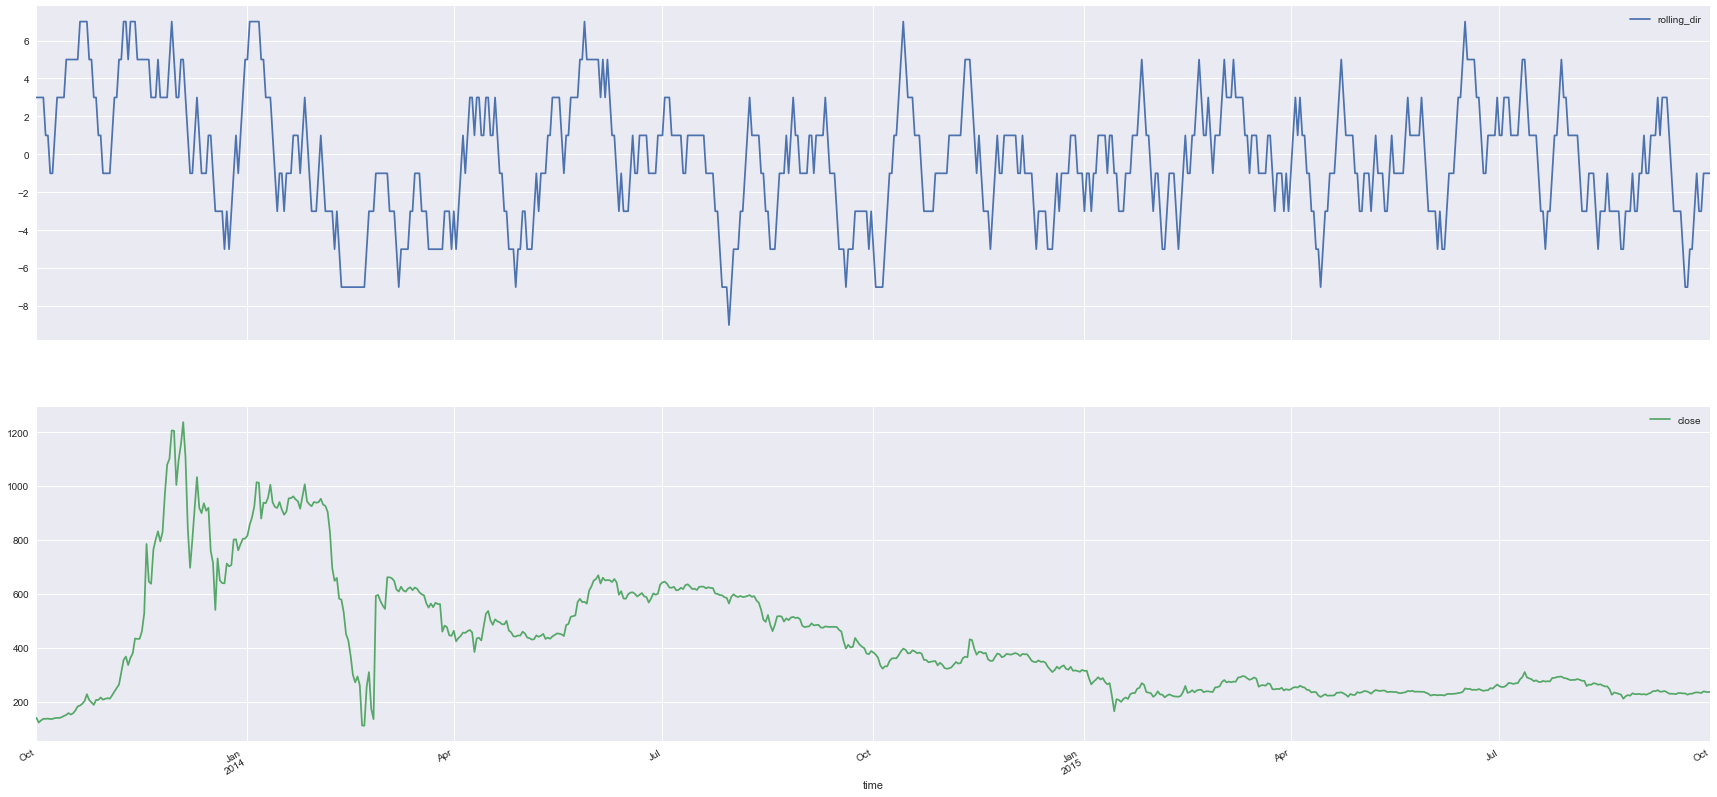

In [88]:
btc[datetime(2013,10,1):datetime(2015,10,1)][['rolling_dir','close']].plot(subplots=True)

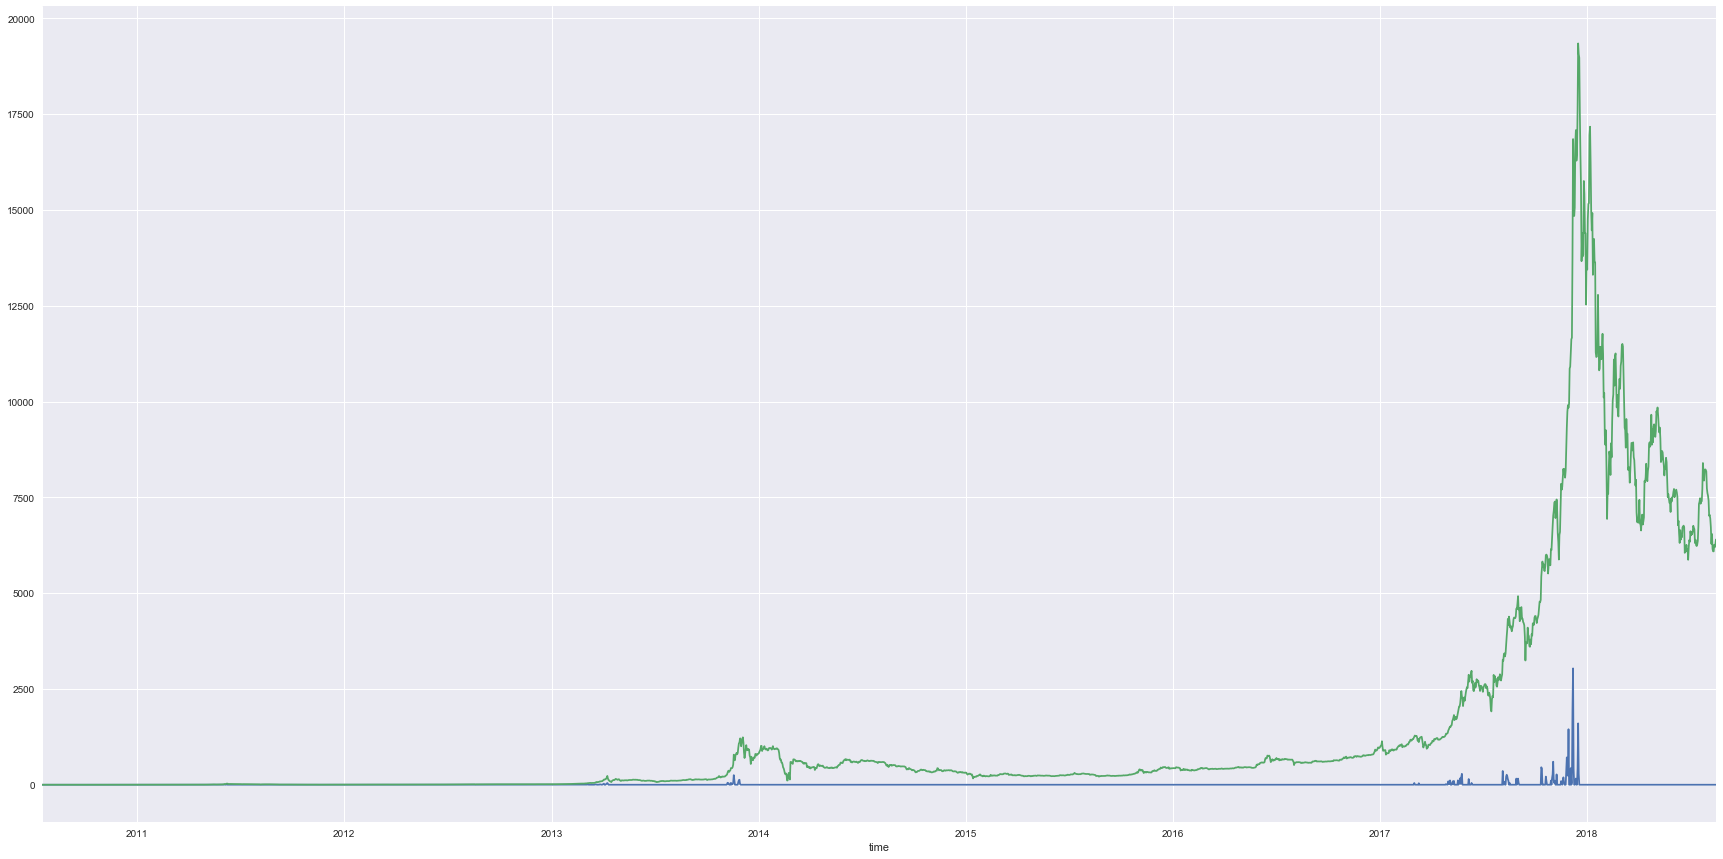

In [89]:
btc.prev_ath.diff().plot()
btc.close.plot()

In [90]:
btc['cycle_bottom'] = btc.apply(lambda d: btc[btc[btc.prev_ath==d.prev_ath].index[0]:d.name].low.min(), axis=1)

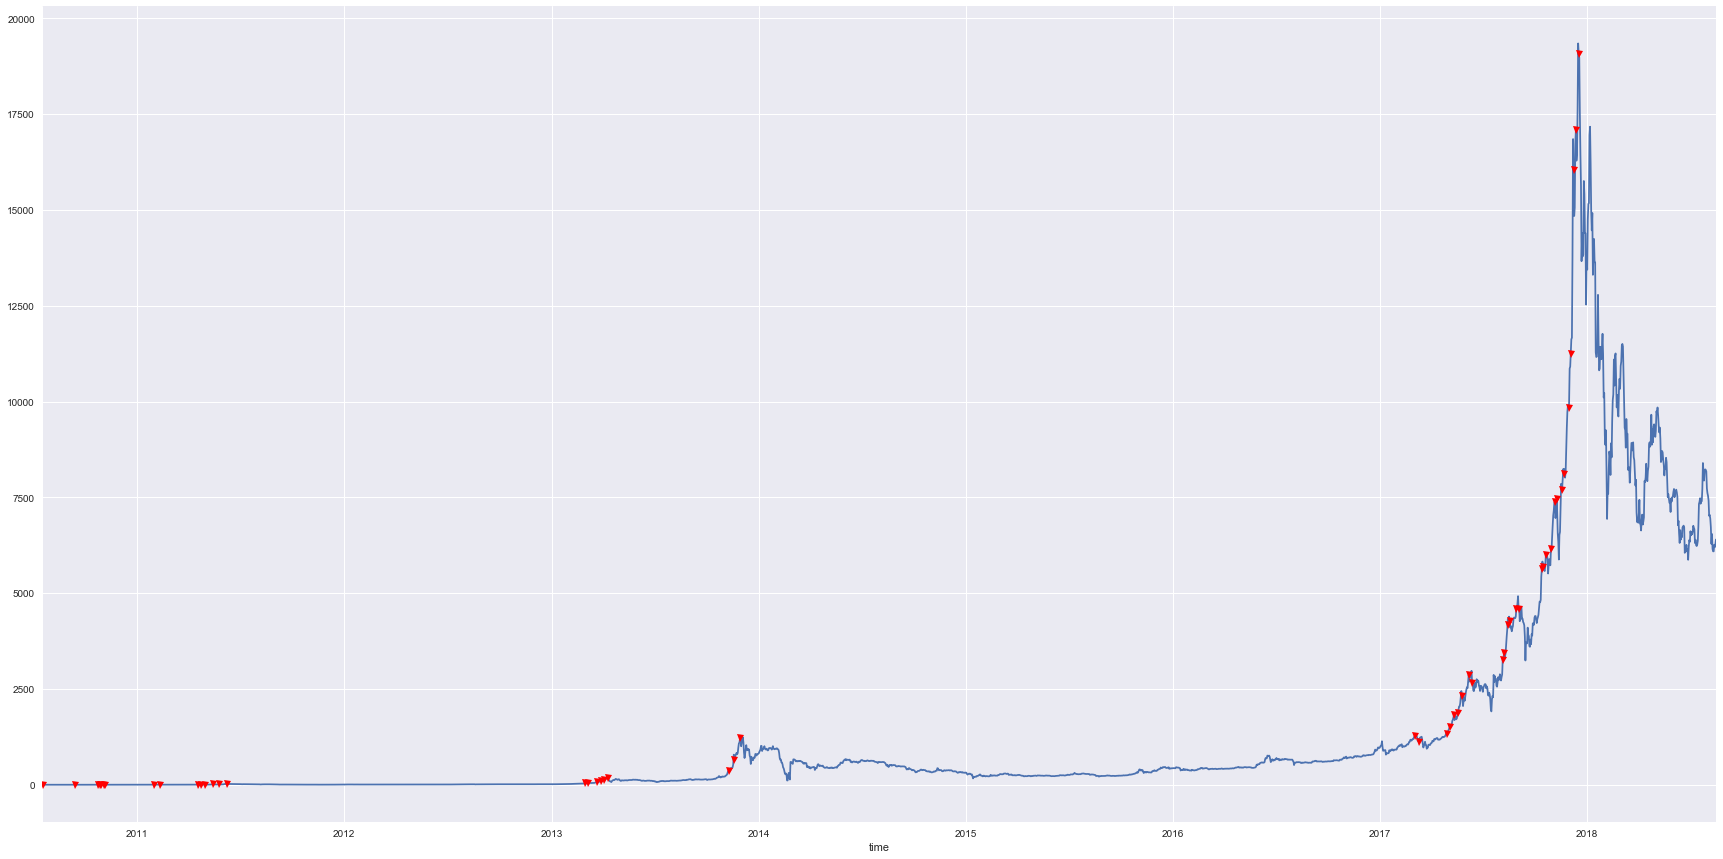

In [91]:
start = None#datetime(2011,1,1)
end = None#datetime(2012,1,1)
data = btc[start:end]
data.close.plot()
data.close.loc[aths.index].plot(marker='v', ls='', color='r')
#data.prev_ath.plot()
#data.cycle_bottom.plot()


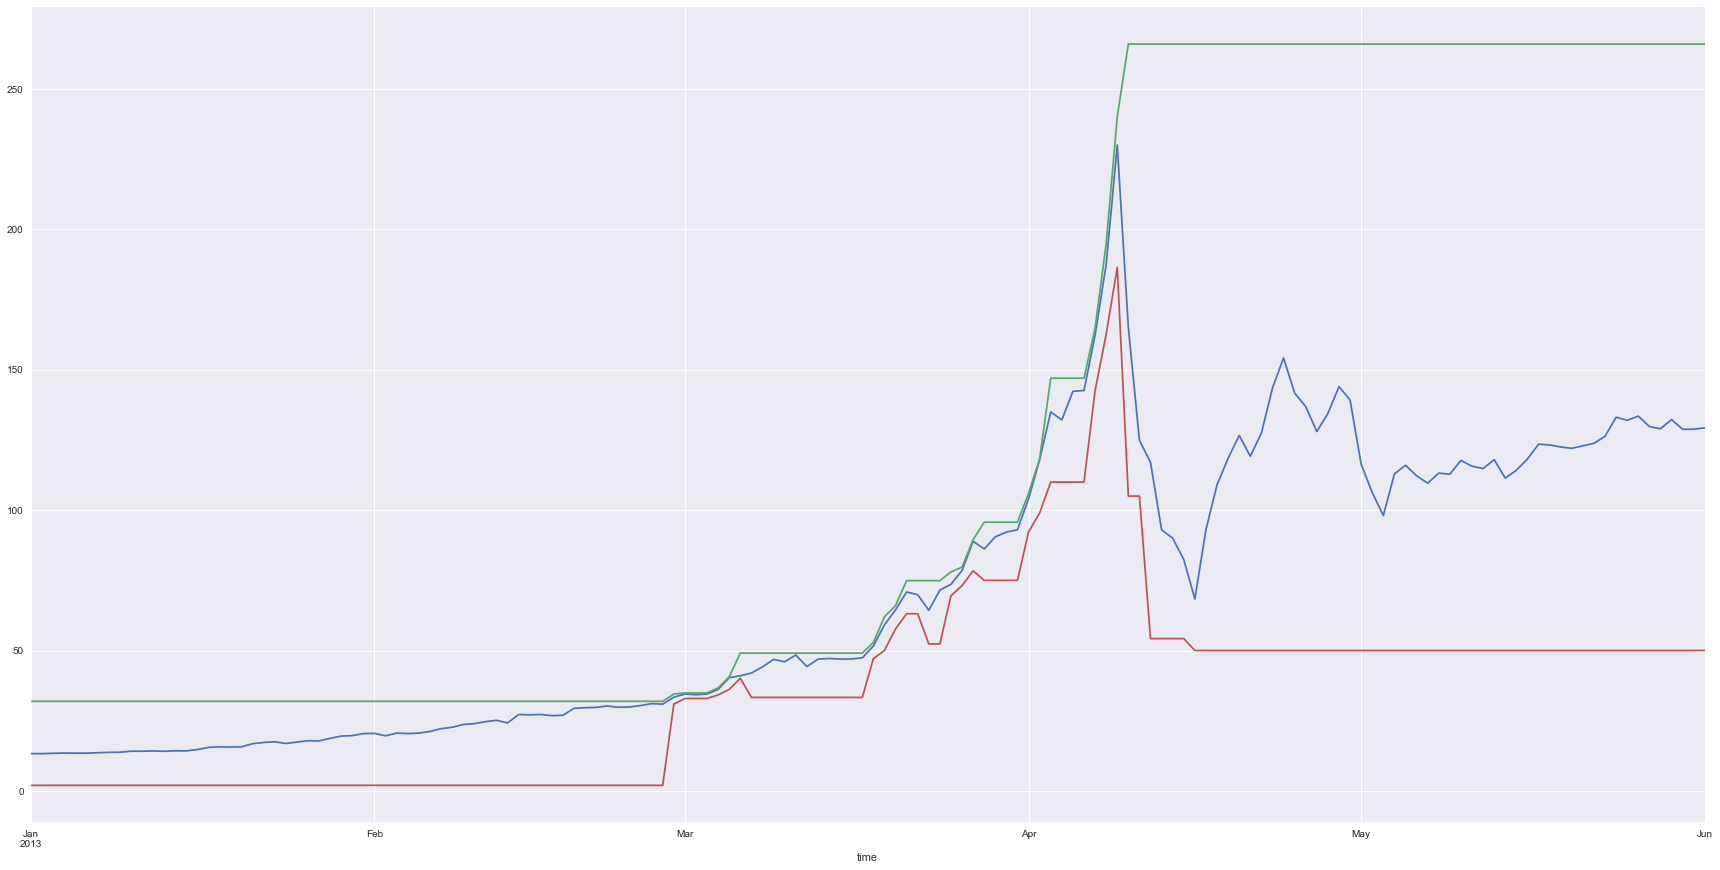

In [92]:
start = datetime(2013,1,1)
end = datetime(2013,6,1)
data = btc[start:end]
data.close.plot()
data.prev_ath.plot()
data.cycle_bottom.plot()

In [93]:
btc['cycle_top1'] = btc.apply(lambda d: btc[btc[btc.cycle_bottom==d.cycle_bottom].index[0]:d.name].high.max(), axis=1)

In [ ]:
prev_ath = 0 
cycle_bottom = 1e9

for p in data.iterrows():
    
    if p.high>prev_ath:
        prev_ath
    # check prev_ath 
    

In [94]:
aths = data[data.prev_ath.diff(1)==0].prev_ath.value_counts().to_frame().reset_index().rename(columns={'index':'price','prev_ath':'days'})
aths.index = [data[data.prev_ath==a].sort_index().index[0] for a in aths.price]
aths = aths.sort_index()
aths

,price,days
2013-01-01,31.91,57
2013-03-01,34.90,2
2013-03-06,49.10,11
2013-03-21,74.90,3
2013-03-28,95.70,3
2013-04-03,147.00,3
2013-04-10,266.00,52


In [95]:
bottoms = data[data.cycle_bottom.diff(1)==0].cycle_bottom.value_counts().to_frame().reset_index().rename(columns={'index':'price','cycle_bottom':'days'})
bottoms.index = [data[data.cycle_bottom==b].sort_index().index[0] for b in bottoms.price]
bottoms = bottoms.sort_index()
bottoms

,price,days
2013-01-01,1.99,57
2013-03-01,32.92,2
2013-03-07,33.30,10
2013-03-21,63.10,1
2013-03-23,52.35,1
2013-03-28,75.00,3
2013-04-03,110.00,3
2013-04-10,105.00,1
2013-04-12,54.25,3
2013-04-16,50.01,46


In [96]:
btc.head(10)

,close,high,low,open,volumefrom,volumeto,prev_ath,time_since_ath,direction,rolling_dir,cycle_bottom,cycle_top1
time,,,,,,,,,,,,
2010-07-17,0.04951,0.04951,0.04951,0.04951,20.00,0.9902,0.04951,0,-1,NaN,0.04951,0.04951
2010-07-18,0.08584,0.08585,0.05941,0.04951,75.01,5.0900,0.08585,0,1,NaN,0.05941,0.08585
2010-07-19,0.08080,0.09307,0.07723,0.08584,574.00,49.6600,0.09307,0,-1,NaN,0.07723,0.09307
2010-07-20,0.07474,0.08181,0.07426,0.08080,262.00,20.5900,0.09307,1,-1,NaN,0.07426,0.08181
2010-07-21,0.07921,0.07921,0.06634,0.07474,575.00,42.2600,0.09307,2,1,NaN,0.06634,0.07921
2010-07-22,0.05050,0.08181,0.05050,0.07921,2160.00,129.7800,0.09307,3,-1,NaN,0.05050,0.08181
2010-07-23,0.06262,0.06767,0.05050,0.05050,2402.50,141.0700,0.09307,4,1,NaN,0.05050,0.08181
2010-07-24,0.05454,0.06161,0.05049,0.06262,496.32,26.7300,0.09307,5,-1,NaN,0.05049,0.06161
2010-07-25,0.05050,0.05941,0.05050,0.05454,1551.48,85.0600,0.09307,6,-1,-3.0,0.05049,0.06161


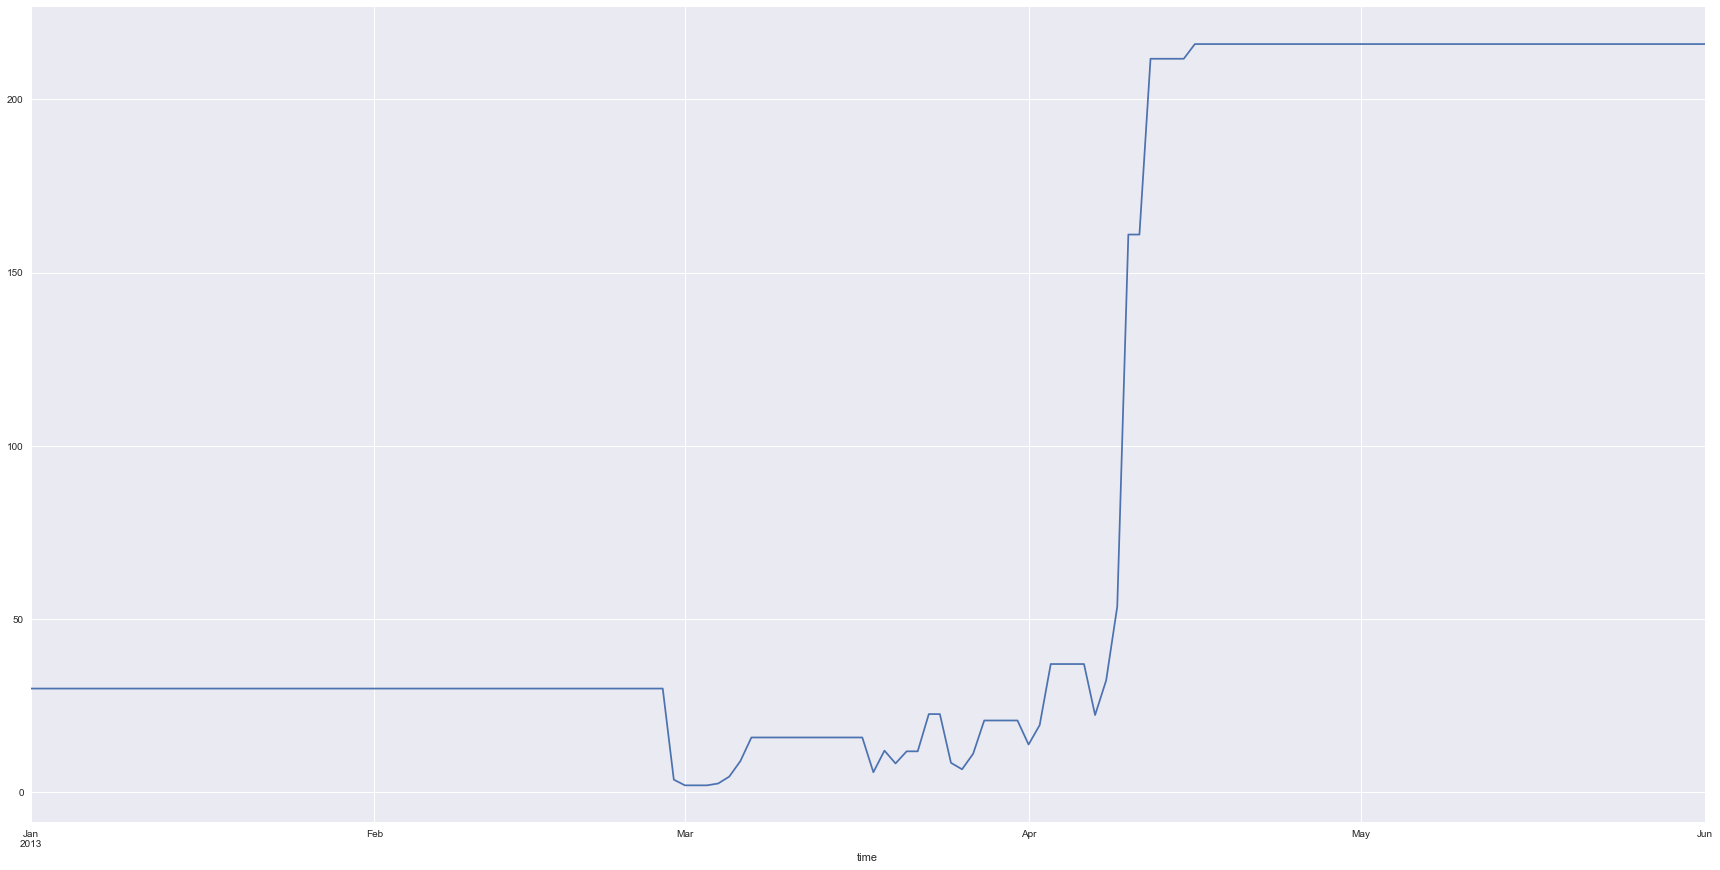

In [97]:
(data.prev_ath - data.cycle_bottom).plot()

In [98]:
btc['time_since_bottom'] = btc.apply(lambda d: (d.name - btc[btc.cycle_bottom==d.cycle_bottom].index[0]).days , axis=1)

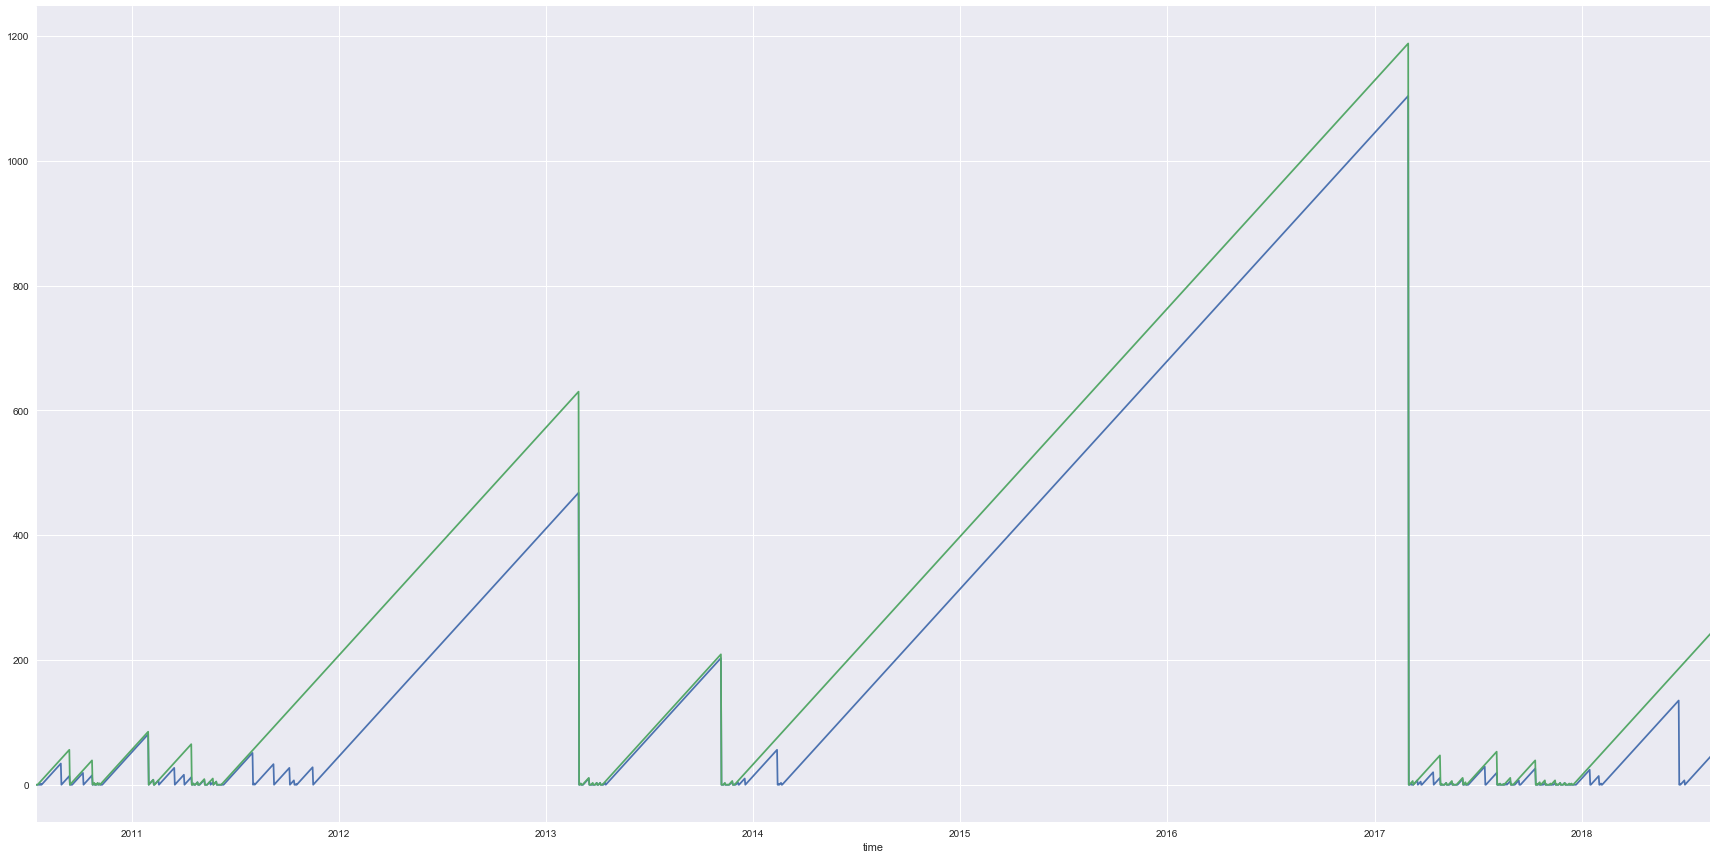

In [103]:
btc.time_since_bottom.plot()
btc.time_since_ath.plot()

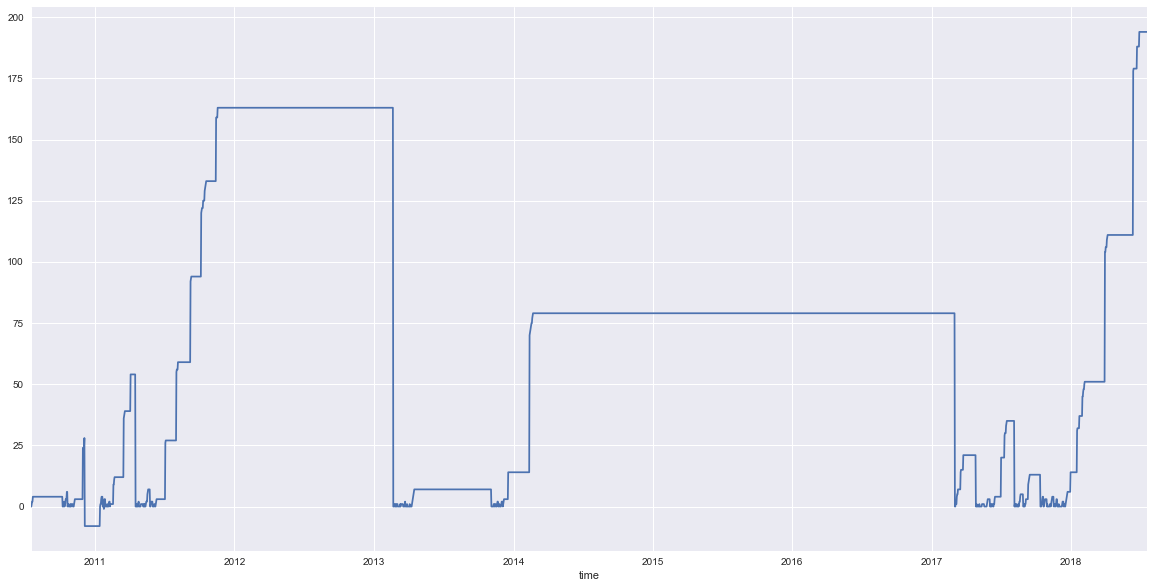

In [196]:

(btc.time_since_ath - btc.time_since_bottom).plot()

On average it take 68 days for bitcoin to find a bottom once a top has been found 

In [197]:
btc.time_since_ath.mean() - btc.time_since_bottom.mean()

68.46340629274965

In [139]:
(0.08080 -.04951)/.04951

0.6319935366592607

In [41]:
btc['dir_buy_signal'] = btc.direction.rolling(9).sum() > 5

In [70]:
btc[(btc.direction.rolling(9).sum() < -5) & (btc.direction.rolling(3).sum()==3)]

,close,high,low,open,volumefrom,volumeto,prev_ath,time_since_ath,direction,rolling_dir,dir_signal,dir_buy_signal
time,,,,,,,,,,,,


In [71]:
btc[(btc.direction.rolling(9).sum() > 5 )& (btc.direction.rolling(3).sum()==-3)]

,close,high,low,open,volumefrom,volumeto,prev_ath,time_since_ath,direction,rolling_dir,dir_signal,dir_buy_signal
time,,,,,,,,,,,,


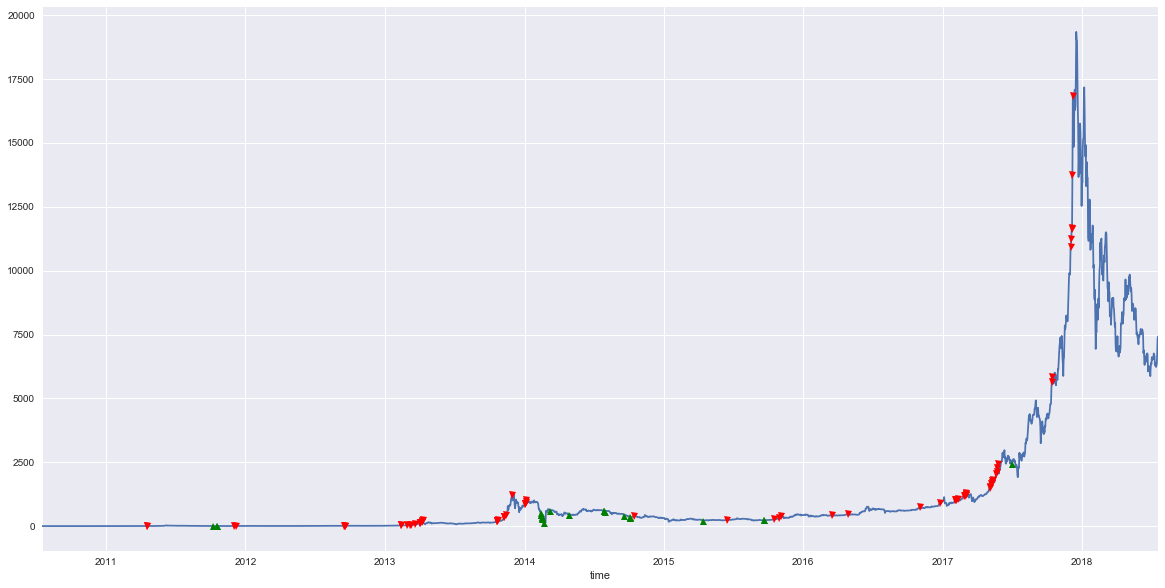

In [73]:
btc.close.plot()
lag = 9
var = btc.direction
threshold
btc[(btc.direction.rolling(9).sum() < -6) & (btc.direction.rolling(3).sum()==-3)].close.plot(marker='^', ls='', color='green')
btc[(btc.direction.rolling(9).sum() > 5 )& (btc.direction.rolling(3).sum()==3)].close.plot(marker='v', ls='', color='red')

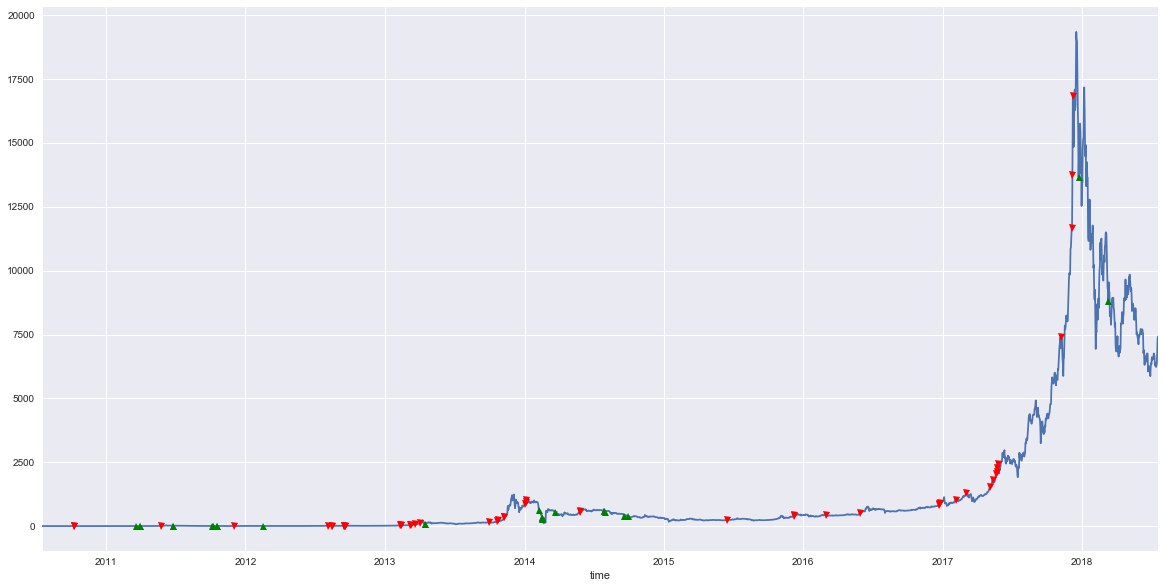

In [77]:
btc.close.plot()
btc[(btc.direction.rolling(6).sum()==-6)].close.plot(marker='^', ls='', color='green')
btc[(btc.direction.rolling(6).sum()==6)].close.plot(marker='v', ls='', color='red')

In [100]:
btc['retracements'] = btc.apply(lambda d: (d.prev_ath - d.close)/d.prev_ath, axis=1)

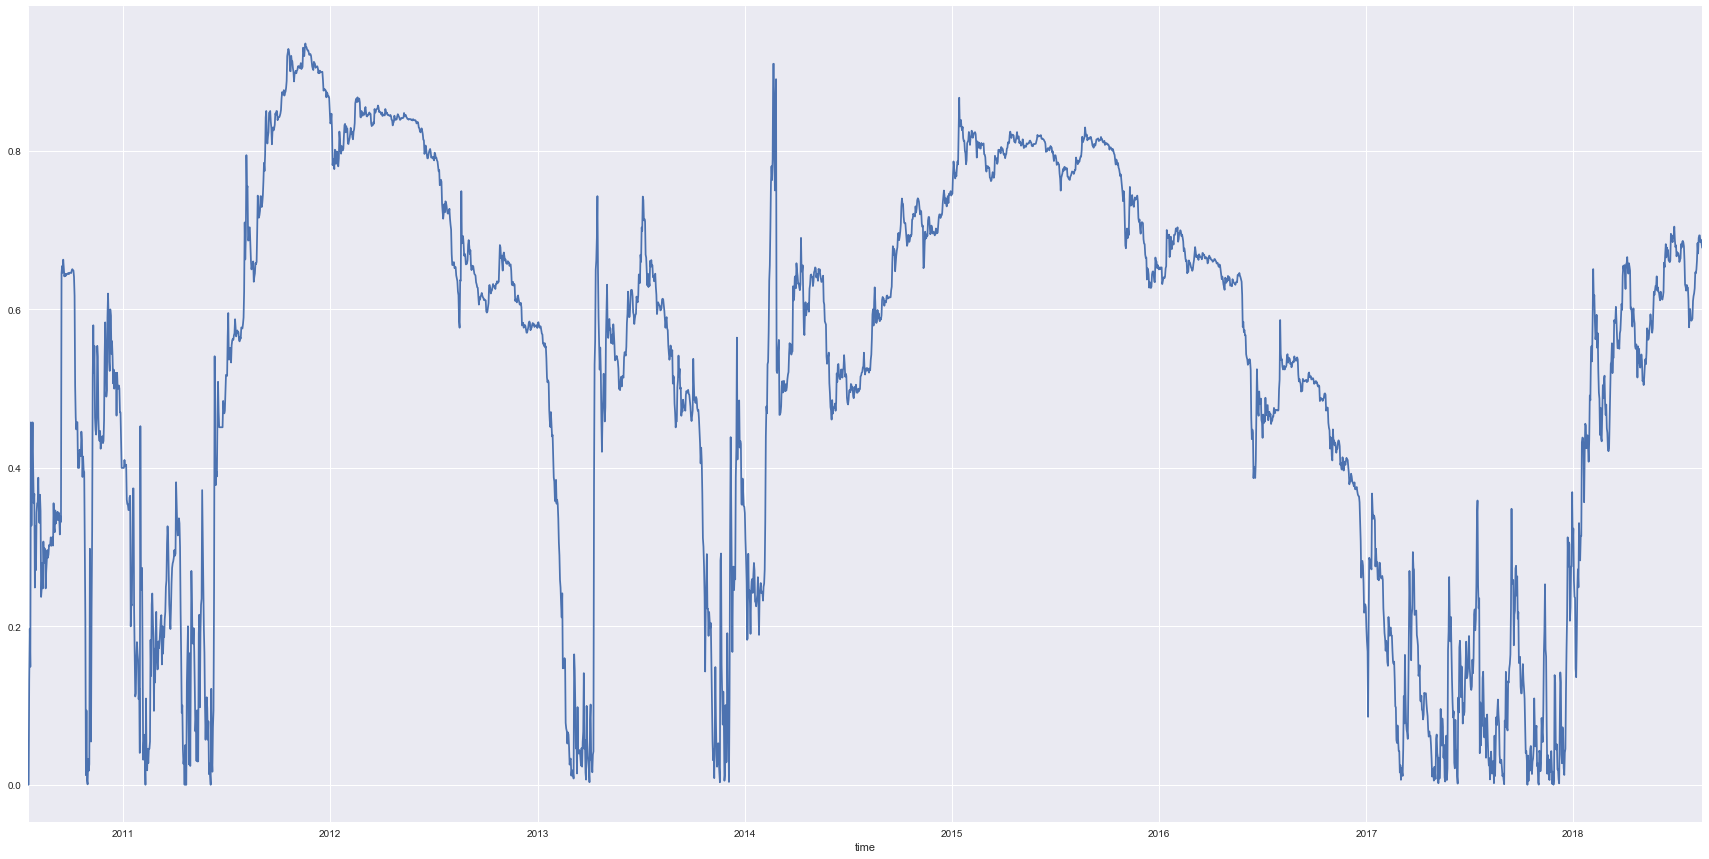

In [101]:
btc.retracements.plot()

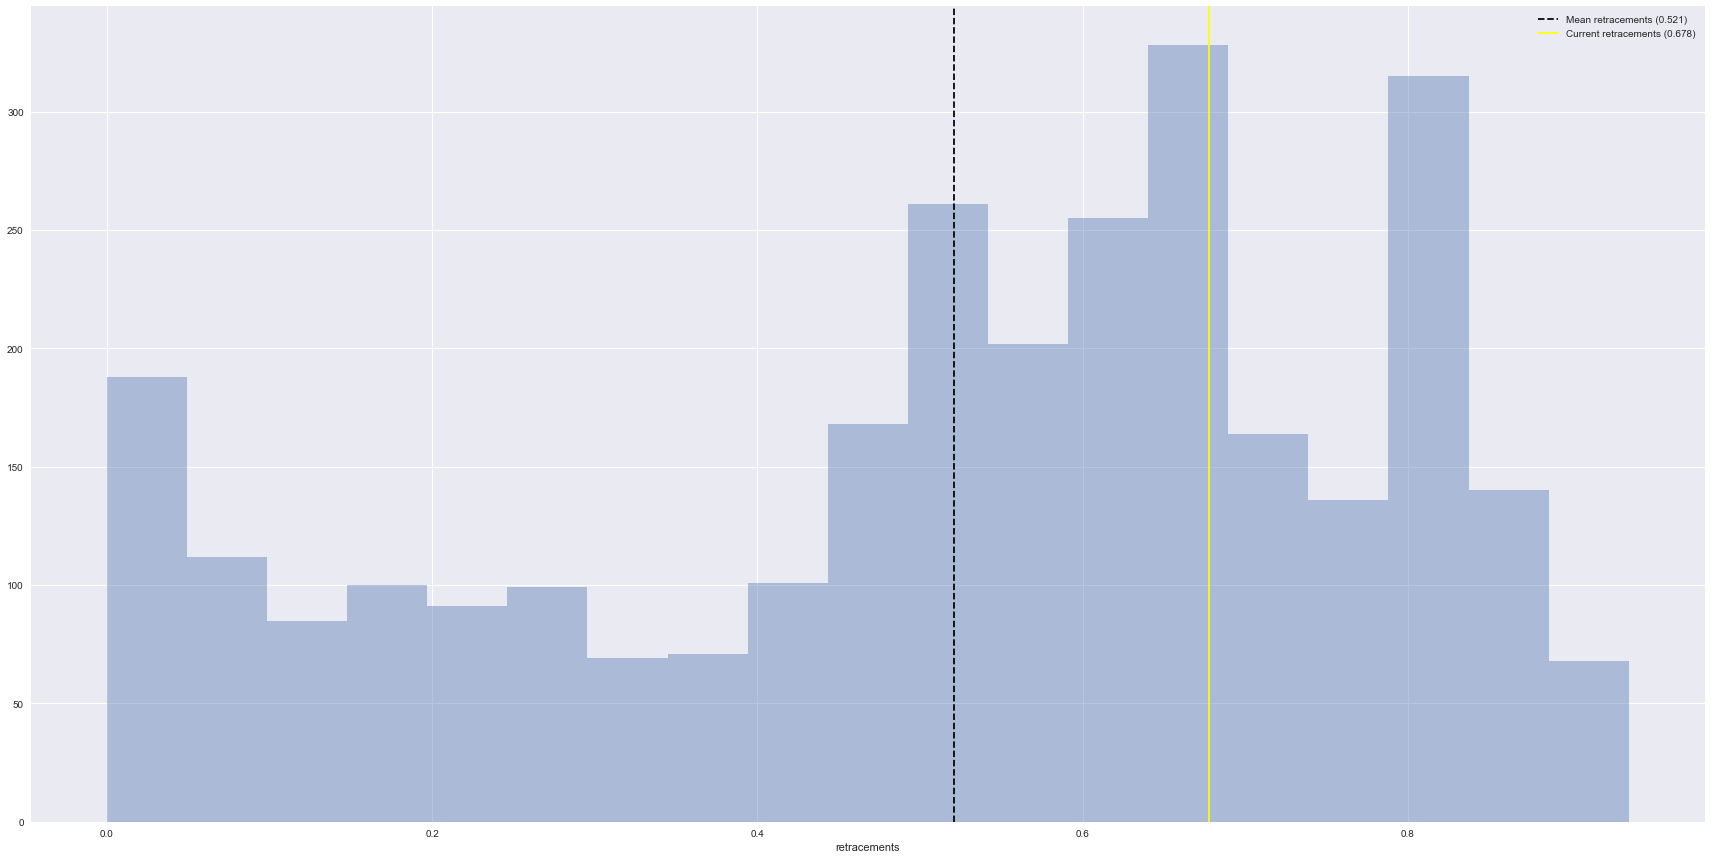

In [102]:
plot_hist(btc.retracements,plot_last=True)

In [215]:

btc['returns'] = btc.close.pct_change(1)
btc[btc.retracements<.20].describe().T

,count,mean,std,min,25%,50%,75%,max
close,571.0,2.288382e+03,3.600021e+03,0.049510,8.415,1.049560e+03,2.755495e+03,1.934549e+04
high,571.0,2.358503e+03,3.732648e+03,0.049510,8.865,1.081780e+03,2.833330e+03,1.987062e+04
low,571.0,2.164129e+03,3.361826e+03,0.010000,8.055,1.015450e+03,2.659105e+03,1.875091e+04
open,571.0,2.251806e+03,3.537752e+03,0.049510,8.350,1.044720e+03,2.750685e+03,1.934660e+04
volumefrom,571.0,6.956385e+04,5.400862e+04,20.000000,27917.300,6.095472e+04,9.731360e+04,3.103354e+05
volumeto,571.0,2.671900e+08,5.626581e+08,0.990200,312273.665,4.546160e+07,2.891319e+08,4.546015e+09
prev_ath,571.0,2.430873e+03,3.818743e+03,0.049510,8.800,1.237550e+03,2.973450e+03,1.934549e+04
time_since_ath,571.0,8.829947e+01,2.719698e+02,0.000000,0.000,3.000000e+00,2.500000e+01,1.183000e+03
direction,571.0,3.134851e-01,9.504257e-01,-1.000000,-1.000,1.000000e+00,1.000000e+00,1.000000e+00
rolling_dir,566.0,2.780919e+00,2.751294e+00,-7.000000,NaN,NaN,NaN,9.000000e+00
